In [11]:
import os
import numpy as np
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.text import Tokenizer

In [41]:
# load model

model = load_model('../trained_model/model.keras')
caption_model = load_model('../trained_model/caption_model.keras')


d:\Prog\Python\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
d:\Prog\Python\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
import matplotlib.pyplot as plt

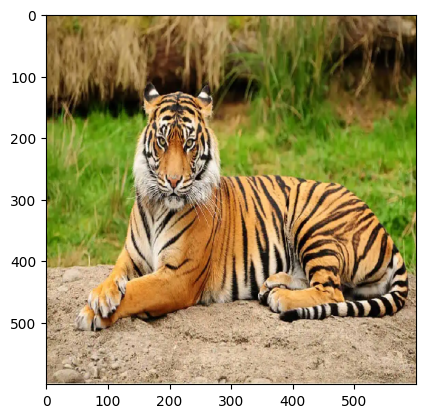

In [26]:
image_path = 'bengal-tiger-from-Asia.webp'
image = load_img(image_path, target_size=(600, 600))
# show
plt.imshow(image)

In [16]:
#import tokenizer model
import pickle
tokenizer_path = '../trained_model/tokenizer.pkl'
tokenizer = Tokenizer()
tokenizer = pickle.load(open(tokenizer_path, 'rb'))

In [47]:


def extract_features(img_path):
    model = EfficientNetB7(weights='imagenet', include_top=False, pooling='avg')
    img = load_img(img_path, target_size=(600, 600))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    feature = model.predict(img_array)[0]
    return feature

In [29]:
def generate_caption(photo_features, max_length=37):
    in_text = 'startseq'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        
        #predict next word
        yhat = caption_model.predict([photo_features.reshape((1, 2560)), sequence], verbose=0)
        yhat = np.argmax(yhat)
        
        word = next((w for w, idx in tokenizer.word_index.items() if idx == yhat), None)
        
        if word is None or word == 'endseq':
            break
        
        in_text += ' ' + word
        
    caption = ' '.join(in_text.split()[1:])
    
    return caption if caption else "Unable to genenrate caption"


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Generated Caption: a skier is skiing down a snowy hill


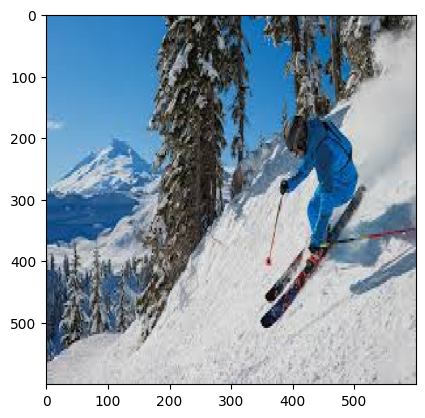

In [54]:
# normalize image
# use model
image_path = 'images.jfif'
plt.imshow(load_img(image_path, target_size=(600, 600)))
photo_features = extract_features(image_path)
caption = generate_caption(photo_features)
print(f"Generated Caption: {caption}")